In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

from lib import *

In [3]:
df_t = load_iedb_tcellepitopes(human_only=True)
df_b = load_iedb_bcellepitopes(human_only=True)

In [5]:
for df in [df_t, df_b]:
    print(df['Epitope', 'Parent Species'].value_counts().head(10))

Mycobacterium tuberculosis    27327
Vaccinia virus                22916
Blattella germanica           17120
Homo sapiens                  16583
Hepacivirus C                 12775
Phleum pratense               12763
Burkholderia pseudomallei     10286
Dengue virus                   6337
Human betaherpesvirus 5        5519
Human gammaherpesvirus 4       4663
Name: (Epitope, Parent Species), dtype: int64
Trypanosoma cruzi           174006
Homo sapiens                 39988
Onchocerca volvulus          13071
Streptococcus pyogenes        7167
Human gammaherpesvirus 4      7106
Hepacivirus C                 6220
Arachis hypogaea              2961
Bos taurus                    2280
Plasmodium falciparum         1869
Triticum aestivum             1827
Name: (Epitope, Parent Species), dtype: int64


In [15]:
len(df_b[df_b['Epitope', 'Parent Species'].str.contains('Plasmodium falciparum', na=False)]['Epitope', 'Description'].unique())

984

In [ ]:
epi_t = df_t['Epitope', 'Description']
epi_b = df_b['Epitope', 'Description']

In [ ]:
k = 2
dfhuman = counter_to_df(count_kmers_proteome(human, k))
dfiedb_t = counter_to_df(count_kmers_iterable(epi_t, k))
dfiedb_b = counter_to_df(count_kmers_iterable(epi_b, k))
for df in [dfhuman, dfiedb_t, dfiedb_b]:
    df.sort_values('seq', inplace=True)
dfm = pd.DataFrame.from_dict(dict(seq=list(dfhuman['seq']),
                   human=list(dfhuman['freq']),
                   iedb_t=list(dfiedb_t['freq']),
                   iedb_b=list(dfiedb_b['freq'])))

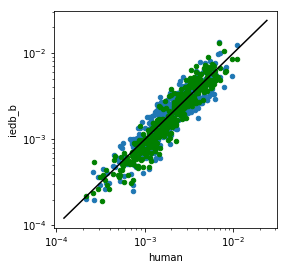

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
x = np.logspace(np.log10(dfm['human'].min())-0.25, np.log10(dfm['iedb_t'].max())+0.25)
plt.plot(x, x, 'k')
dfm.plot('human', 'iedb_t', kind='scatter', logx=True, logy=True, ax=ax)
dfm.plot('human', 'iedb_b', kind='scatter', logx=True, logy=True, ax=ax, color='g')
#ax.set_xlim(2e-7, 5e-3)
#ax.set_ylim(2e-7, 5e-3)

In [7]:
dfm['fold_t'] = dfm['iedb_t']/dfm['human']
dfm['fold_b'] = dfm['iedb_b']/dfm['human']

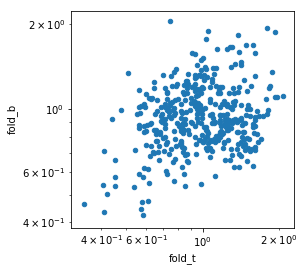

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('fold_t', 'fold_b', kind='scatter', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')

In [9]:
scipy.stats.spearmanr(dfm['fold_t'], dfm['fold_b']), np.corrcoef(np.log(dfm['fold_t']), np.log(dfm['fold_b']))[1, 0]

(SpearmanrResult(correlation=0.15776179851124067, pvalue=0.0015497359624458218),
 0.26492549779006813)

In [10]:
dfm.sort_values('fold_t')

,seq,human,iedb_t,iedb_b,fold_t,fold_b
121,HC,0.000736,0.000252,0.000340,0.341796,0.461337
61,EC,0.001489,0.000604,0.000802,0.405794,0.538783
21,CC,0.000730,0.000299,0.000522,0.408944,0.714381
33,CQ,0.001101,0.000451,0.000476,0.409735,0.432888
261,QC,0.000953,0.000402,0.000479,0.422139,0.502471
263,QE,0.004019,0.001775,0.003733,0.441632,0.928780
23,CE,0.001289,0.000582,0.000744,0.451120,0.576944
301,SC,0.001925,0.000874,0.001035,0.454076,0.537641
34,CR,0.001326,0.000602,0.000876,0.454158,0.660597
252,PP,0.006179,0.002942,0.006150,0.476095,0.995293
